In [50]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sys
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [42]:
products_df = pd.DataFrame()

if not os.path.isfile("products_df5.ftr"):
    # exit() crashes kernel
    sys.exit(
        'The file "products_df5.ftr" was not found! Please run "Hermel_Gabriel_1_notebook_nettoyage_092022.ipynb" in the same directory first.'
    )
else:
    products_df = pd.read_feather("products_df5.ftr")


In [49]:
products_df_sel_categ = products_df.loc[products_df["select_category"].notnull()]
products_df_sel_categ.reset_index(drop=True, inplace=True)
products_df_sel_categ = products_df_sel_categ.dropna(
    axis=1, thresh=products_df_sel_categ.shape[0] * 0.2
)
products_df_sel_categ.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298110 entries, 0 to 298109
Data columns (total 68 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   code                      298110 non-null  object 
 1   product_name              296922 non-null  object 
 2   brands                    216994 non-null  object 
 3   primary_category          298110 non-null  object 
 4   secondary_category        298110 non-null  object 
 5   tertiary_category         298110 non-null  object 
 6   select_category           298110 non-null  object 
 7   energy-kcal_100g          298110 non-null  float64
 8   proteins_100g             298110 non-null  float64
 9   carbohydrates_100g        298110 non-null  float64
 10  sugars_100g               295593 non-null  float64
 11  fat_100g                  298110 non-null  float64
 12  saturated-fat_100g        290445 non-null  float64
 13  monounsaturated-fat_100g  173882 non-null  f

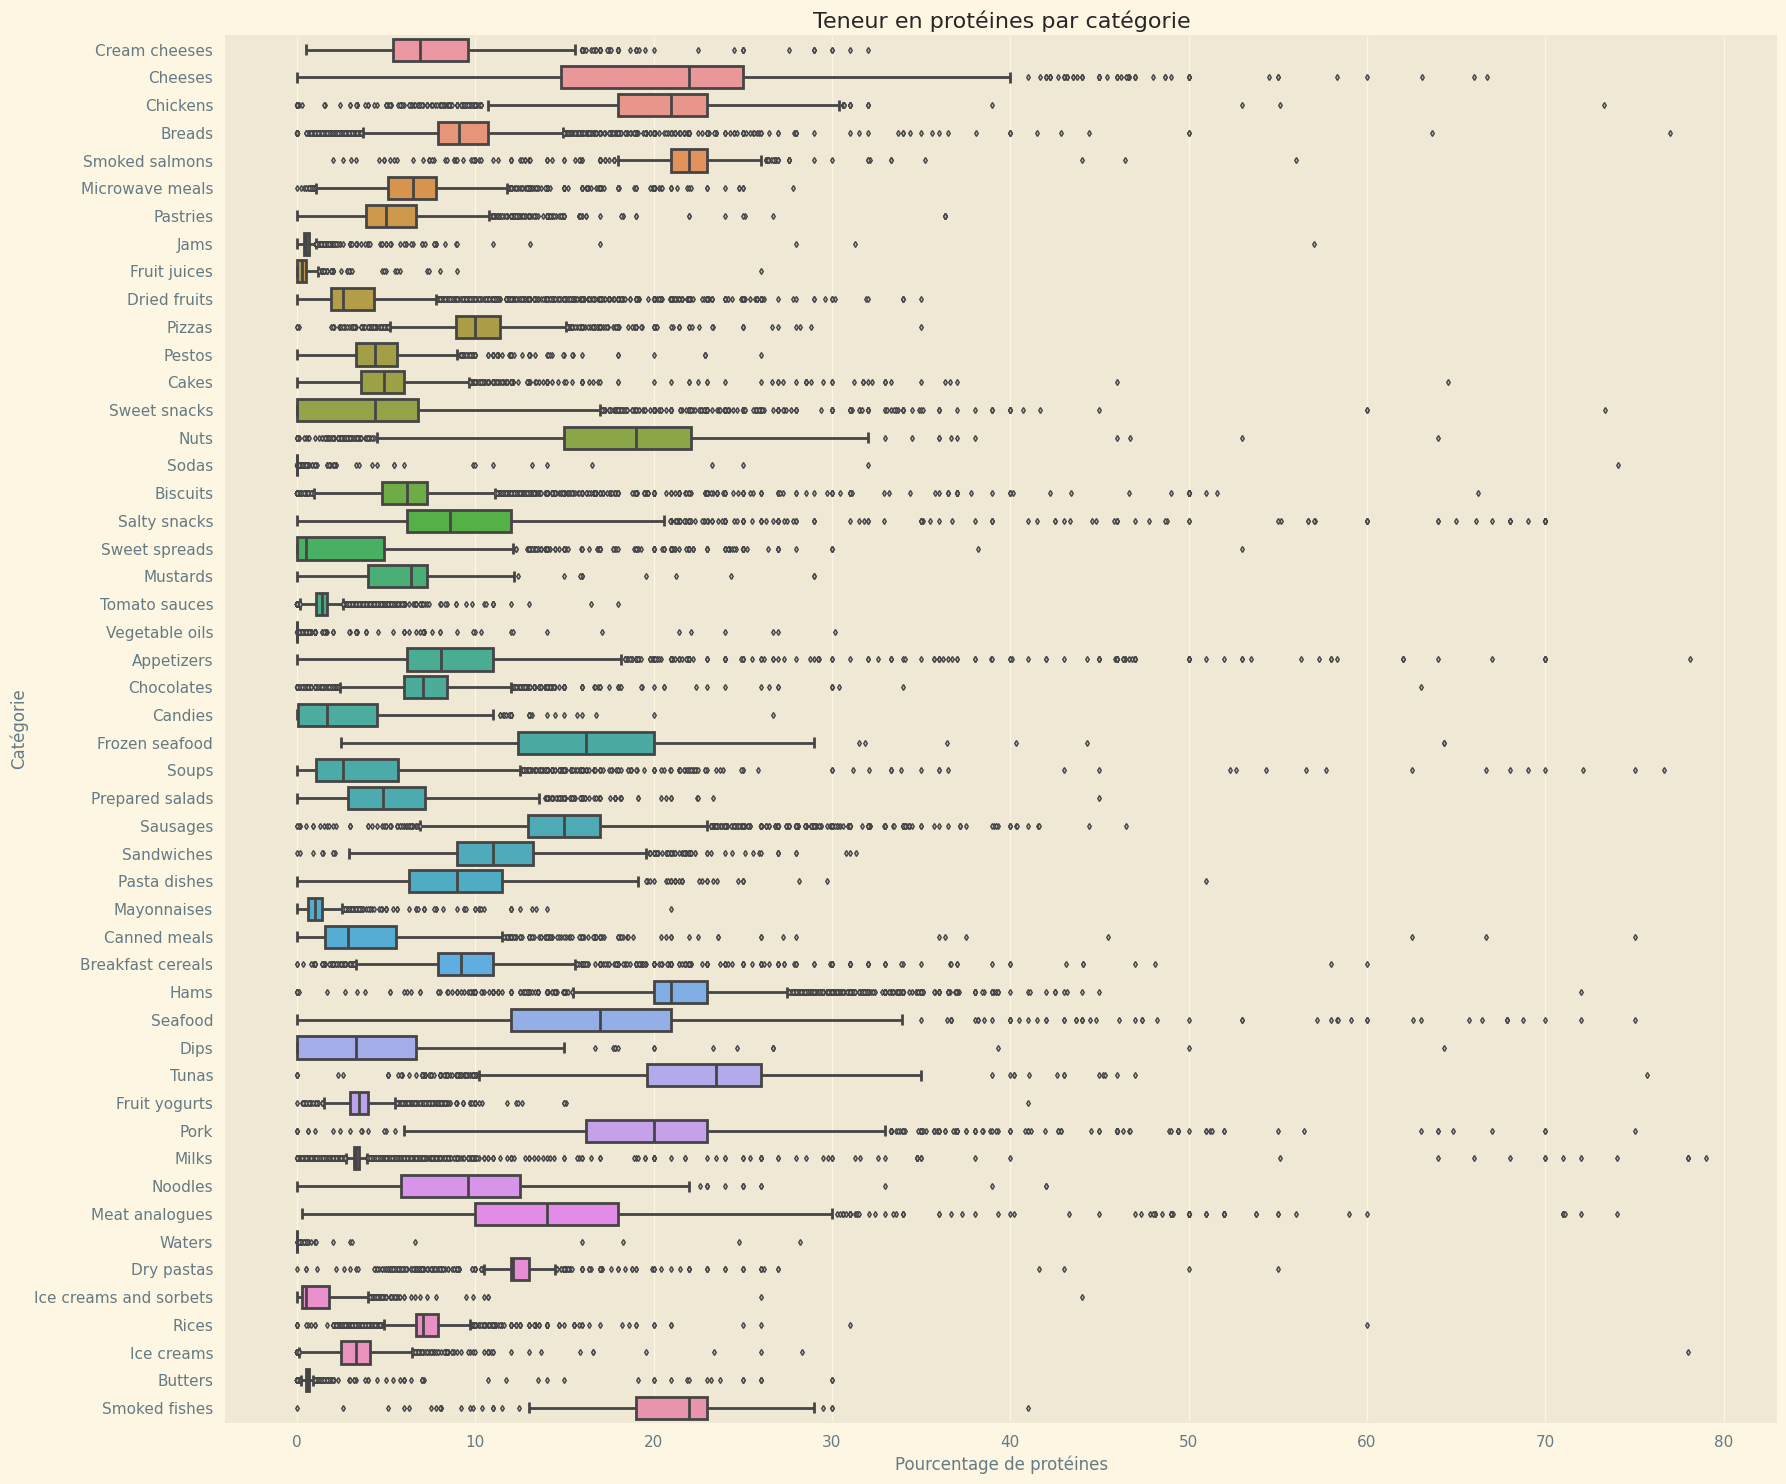

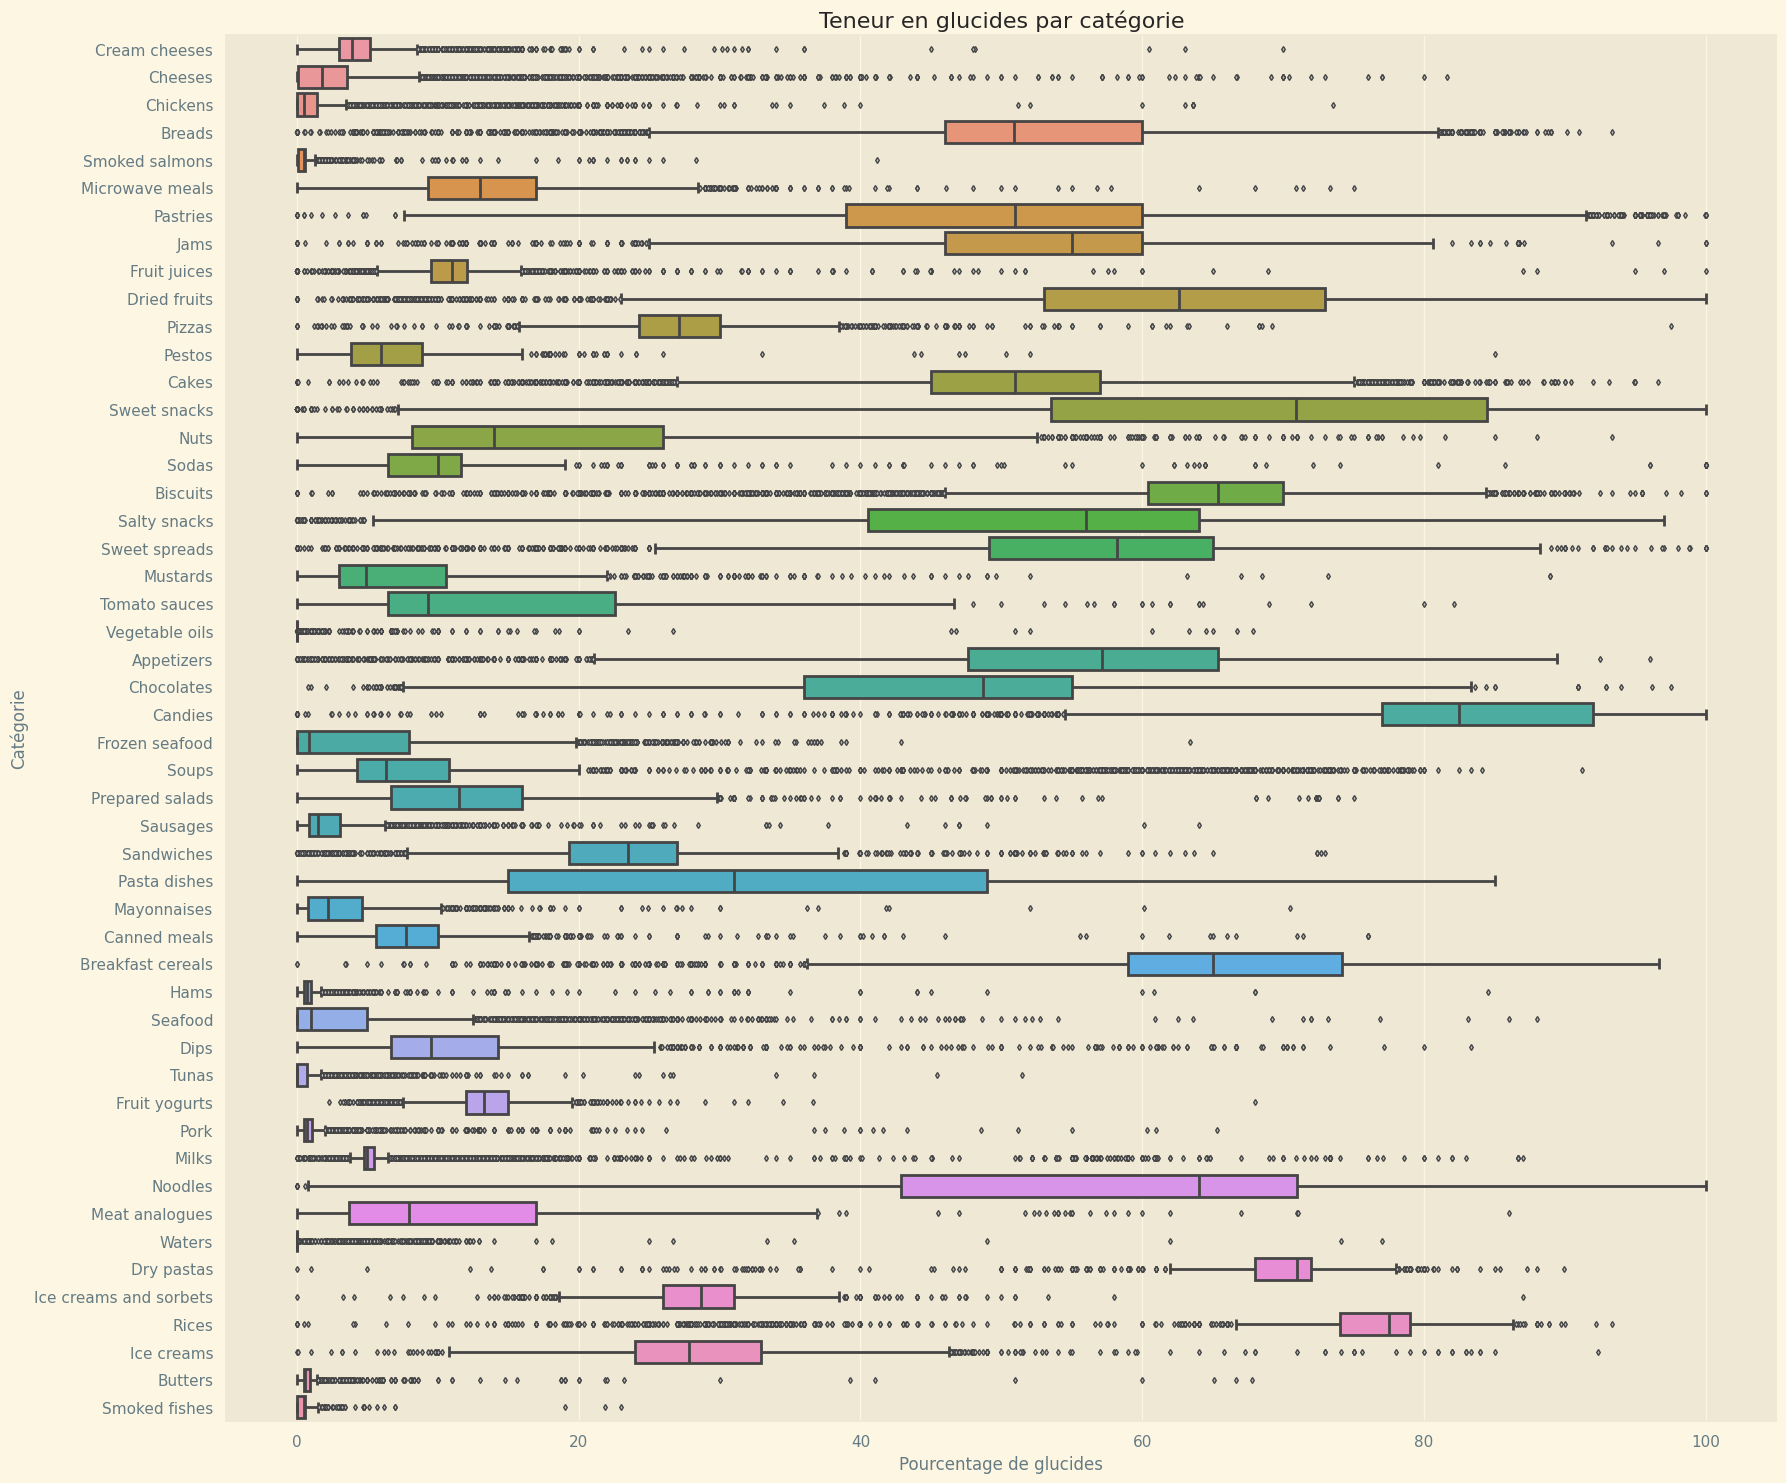

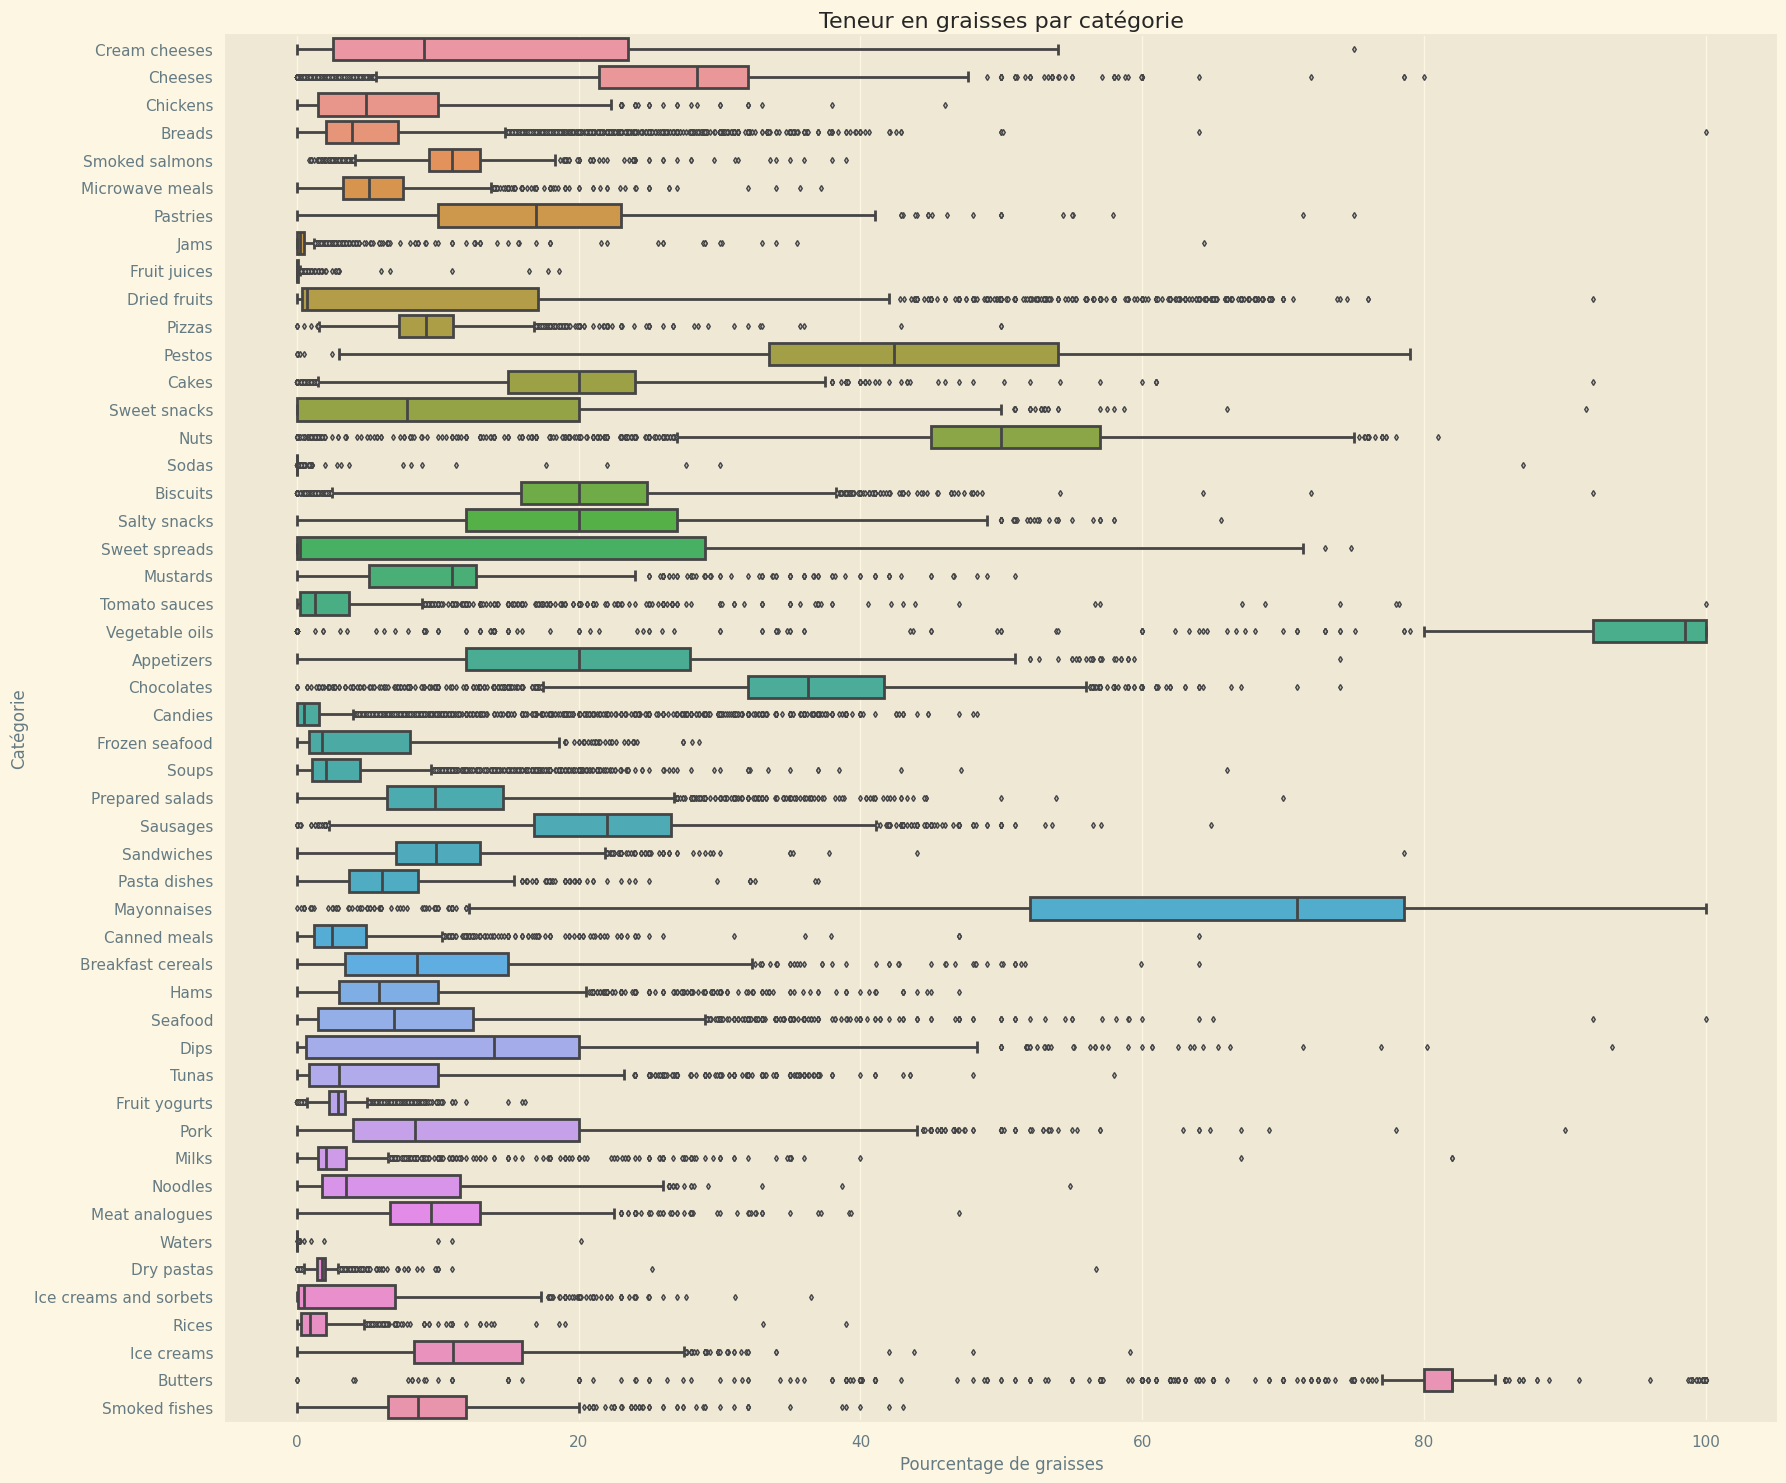

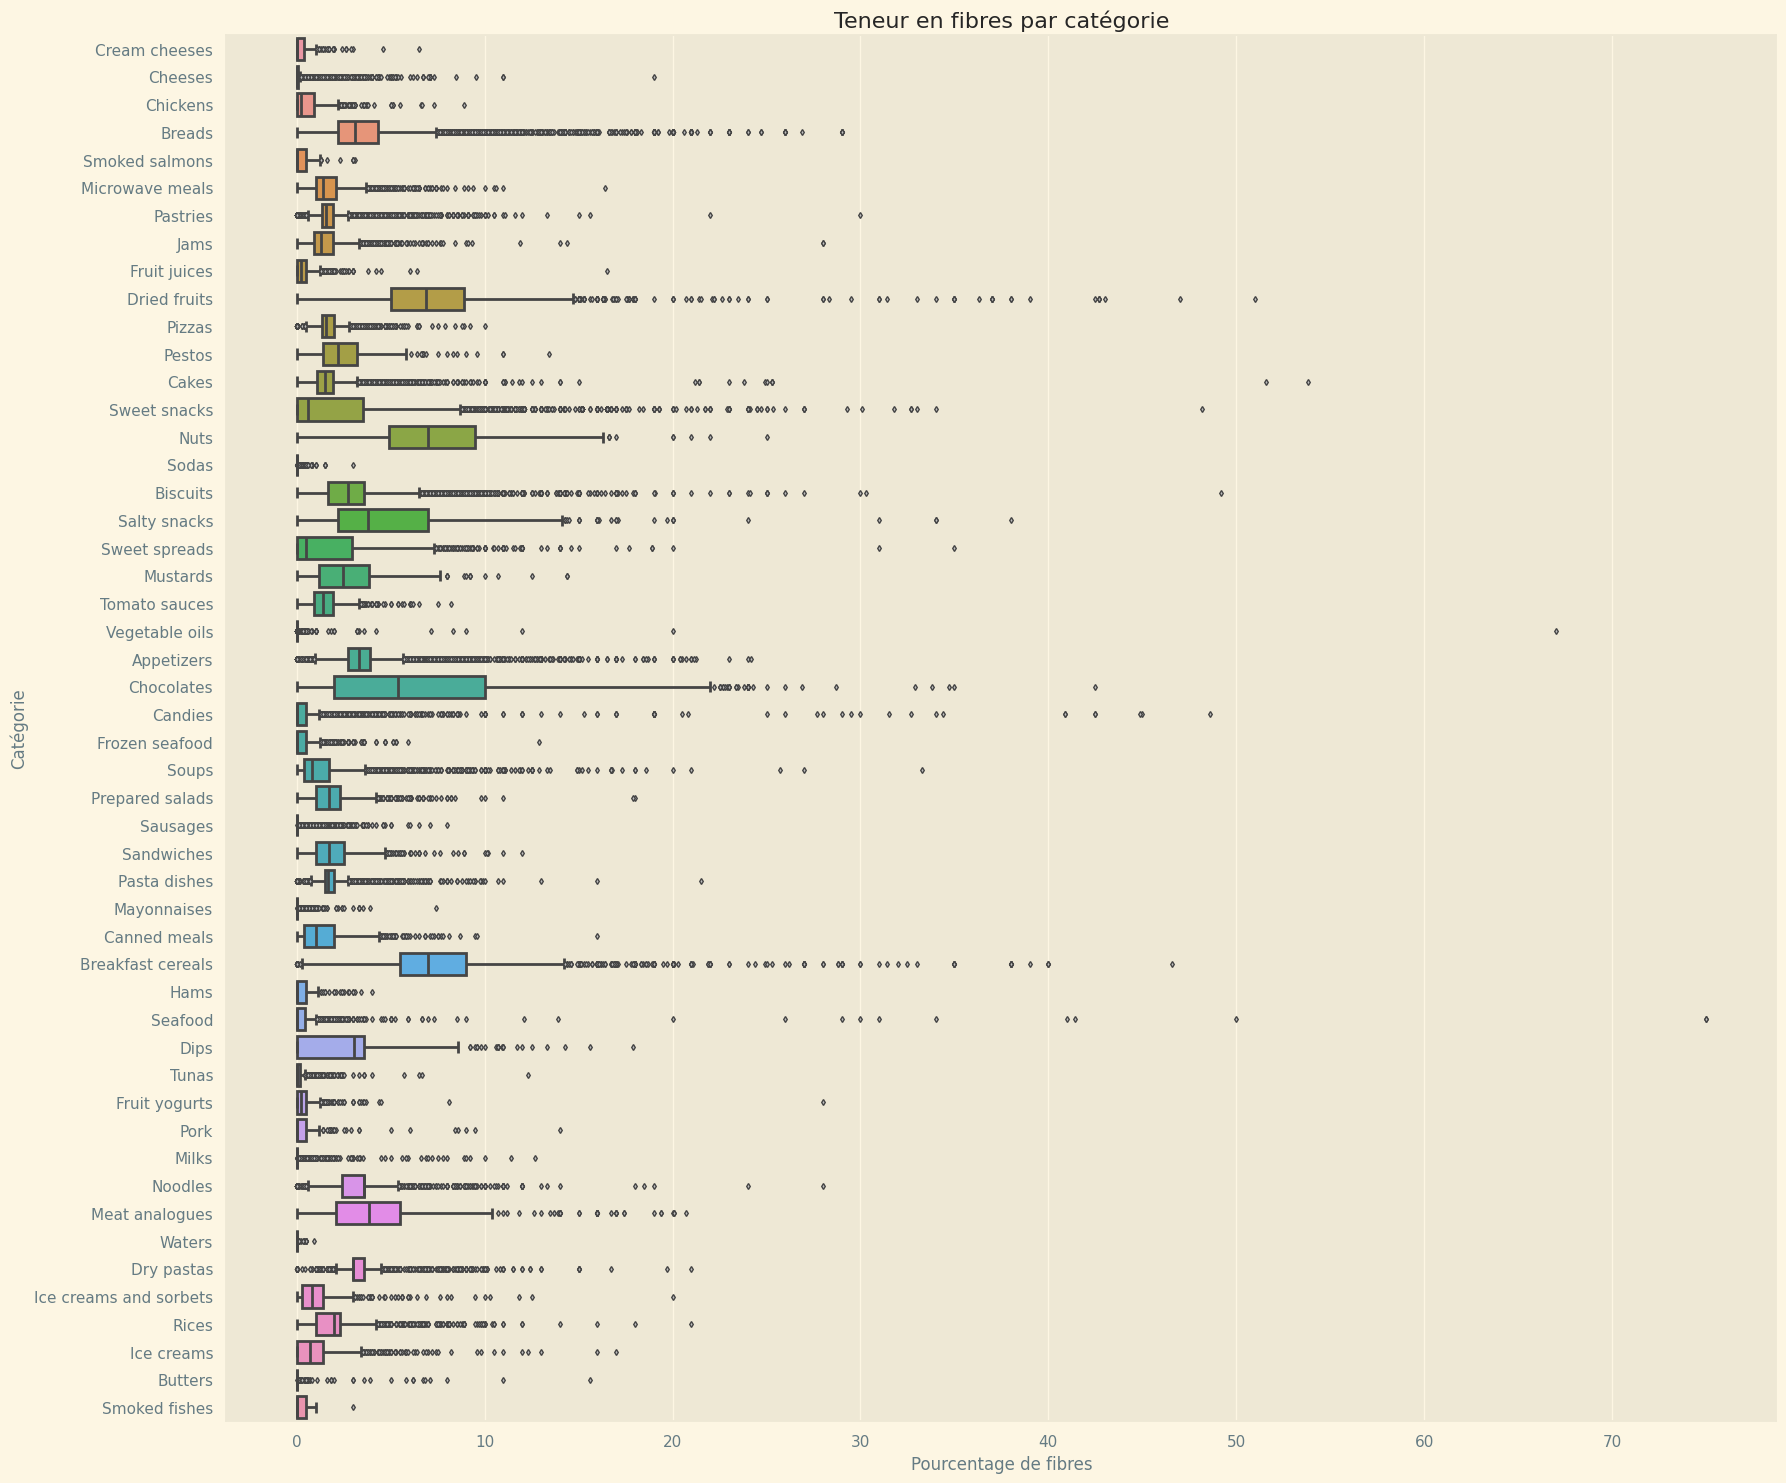

In [71]:
macro_cols_names = [
    ["proteins_100g", "protéines"],
    ["carbohydrates_100g", "glucides"],
    ["fat_100g", "graisses"],
    ["fiber_100g", "fibres"],
]

for macro_col_name in macro_cols_names:
    plt.style.use("Solarize_Light2")
    sns.boxplot(
        y=products_df_sel_categ["select_category"],
        x=products_df_sel_categ[macro_col_name[0]],
        flierprops=dict(markerfacecolor="0.75", markersize=3, linestyle="none"),
    ).set(
        xlabel=f"Pourcentage de {macro_col_name[1]}",
        ylabel="Catégorie",
        title=f"Teneur en {macro_col_name[1]} par catégorie",
    )
    sns.set(rc={"figure.figsize": (20, 18)})
    plt.show()
